In [1]:
# ######### data mungling with pandas before app-py for Flask # ######### 
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [2]:
import pandas as pd
import numpy as np
import datetime as dt
#  <NAME>_df = pd.read_csv('<FILE>.csv', encoding='ISO-8859-1')

In [3]:
import matplotlib.pyplot as plt
import matplotlib.style as style
# style.available
style.use( 'fivethirtyeight')

In [4]:
# the list below will used in our functions to colorize output
colorList=['coral',
           'goldenrod',
           'salmon',
           'orangered',
           'darkolivegreen',
           'olivedrab',
           'cadetblue',
           'palevioletred',
           'mediumorchid',
           'darkorange'
          ]

In [5]:
import matplotlib.path as mpath
# this is a code of a negative-spaced-star-shaped SVG path that will
# mark rounds help player  see important date points easily
def cut_st4r(n):
    star = mpath.Path.unit_regular_star(n)
    circle = mpath.Path.unit_circle()
    # concatenate the circle with an internal cutout of the star
    verts = np.concatenate([circle.vertices, star.vertices[::-1, ...]])
    codes = np.concatenate([circle.codes, star.codes])
    cut_star = mpath.Path(verts, codes)
    return cut_star

In [6]:
file_stateAllHomes = 'zillow/state/State_Zhvi_AllHomes.csv'

In [7]:
def stateDateTdf(file):
    """file: path to CSV file obtained from ZILLOW
    returns a dataframe with dateTime timestamp on index
    """
    _df = pd.read_csv(file, encoding='ISO-8859-1').drop(columns=['RegionID','SizeRank'])
    _Tdf = _df.set_index(['RegionName']).T.reset_index()
    _Tdf['Date'] = _Tdf['index']
    _Tdf['DateDT']=pd.to_datetime(_Tdf['Date']) 
    return _Tdf.drop(columns=['index','Date']).set_index(['DateDT'])

In [8]:
allHomes_df = stateDateTdf(file_stateAllHomes)
# allHomes_df

In [9]:
def stateYrAvgTdf(file):
    """file:path to file
    ##returns a dataframe##
    """
    _df = pd.read_csv(file, encoding='ISO-8859-1').drop(columns=['RegionID','SizeRank'])
    _Tdf = _df.set_index(['RegionName']).T.reset_index()
    _Tdf['Date'] = _Tdf['index']
    _Tdf['DateDT']=pd.to_datetime(_Tdf['Date']) 
    _Tdf['DateMo'] = _Tdf['DateDT'].dt.month
    _Tdf['DateYr'] = _Tdf['DateDT'].dt.year
    return _Tdf.drop(columns=['index','Date','DateMo']).groupby(['DateYr']).mean()

In [10]:
allHomesYrAvg_df = stateYrAvgTdf(file_stateAllHomes)
# allHomesYrAvg_df 24 rows × 51 columns

In [11]:
def listRoundLabels(yearStart,yearEnd):
    _list_=np.arange(yearStart,yearEnd)
    add_part='-01'
    add_list=[]
    for year in _list_:
        add_list.append(str(year)+add_part)
    return add_list        

In [12]:
def roundYearEndTdf(file,yearStart,yearEnd):
    _df = pd.read_csv(file, encoding='ISO-8859-1').drop(columns=['RegionID','SizeRank'])
    return _df.set_index('RegionName')[listRoundLabels(yearStart,yearEnd)].T.interpolate()

In [13]:
def pltPlotEZSeries(ser1es,labelUser):
    """series, labelUser:name on legend for series
    """    
    c0lorList = colorList.copy()
    rand1nt = np.random.randint(0,len(c0lorList))
    c0lor = c0lorList[rand1nt] 
    rand2nt=(len(c0lorList)-rand1nt)
#     c0lor2 = c0lorList[rand2nt] 
    plt.figure(figsize=(15,10))
    plt.rcParams["font.size"] = 18
    plt.grid(True)
    plt.title("Price vs Time")
    plt.xlabel("Time")
    plt.ylabel("Price ")
    plt.plot( ser1es,
             linestyle='--', 
             marker = 'o', 
             markersize='20',
             markeredgecolor='whitesmoke',
#              markeredgecolor=c0lor2,
             markeredgewidth='3',
             color = c0lor,
             label=labelUser
            )
    plt.legend(loc='best')
    plt.show()

In [14]:
def pltPlotEZ(df,label):
    """df:dataframe, label:field name to bring
    """
    c0lorList = colorList.copy()
    rand1nt = np.random.randint(0,len(c0lorList))
    c0lor = c0lorList[rand1nt] 
    plt.figure(figsize=(15,10))
    plt.rcParams["font.size"] = 18
    plt.grid(True)
    plt.title("Price vs Time Series")
    plt.xlabel("Time")
    plt.ylabel("Price ")
    plt.plot(df[label],
             linestyle='--', 
             marker = 'o', 
             markersize='15',
             markeredgecolor='whitesmoke',
             markeredgewidth='1.5',
             color = c0lor,
             label=label
            )
    plt.legend(loc='best')
#     plt.show()
    return 

In [15]:
def pltPlotEZstar(df,label):
    c0lorList = colorList.copy()
    rand1nt = np.random.randint(0,len(c0lorList))
    c0lor = c0lorList[rand1nt] 
    plt.figure(figsize=(14,6))
    plt.rcParams["font.size"] = 10
    plt.grid(True)
    plt.title("Price vs Time")
    plt.xlabel("Time")
    plt.ylabel("Price ")
    plt.plot(df.index,
             df[label],
             linestyle='--', 
             marker = cut_st4r(5), 
             markersize='35',
             markeredgecolor='whitesmoke',
             markeredgewidth='1.5',
             color = c0lor,
             label=label
            )
    plt.legend(loc='best')
#     plt.show()
    return 

In [16]:
def PlotFieldList(pivoted_Tdf,field_list):
    plt.figure(figsize=(25,15))
    plt.rcParams["font.size"] = 16
    plt.grid(True)
    plt.xlabel("X: base value")
    plt.xlabel("y: actual/predicted")

    for field in field_list:
        plt.plot(pivoted_Tdf.index, pivoted_Tdf[field], linestyle='--', marker = 'o',label=field)
        plt.legend(loc='best')
        
    plt.bar(pivoted_Tdf.index,pivoted_Tdf.mean(axis=1), color = 'g',  alpha = 0.30, align='center', label = 'Overall Average')
    plt.legend(loc='best')
    plt.show()

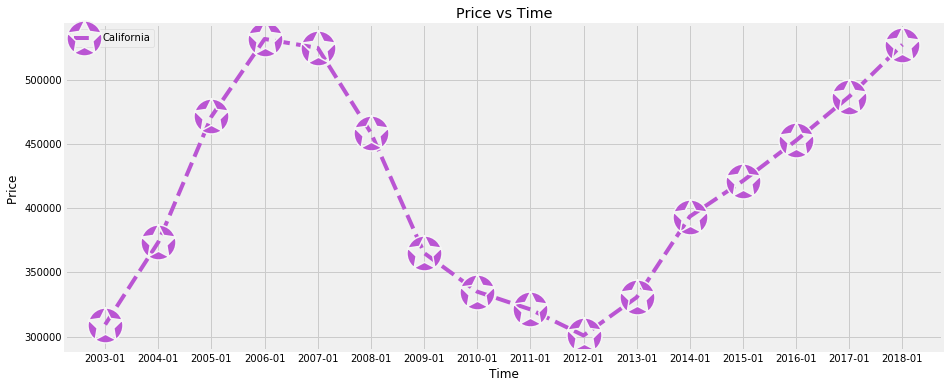

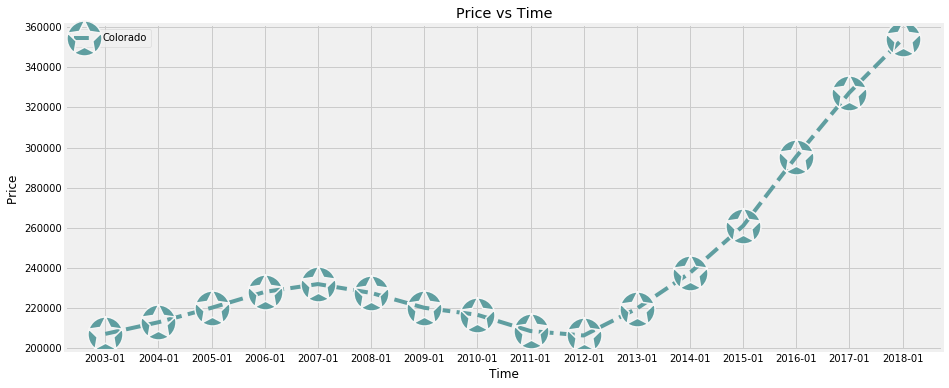

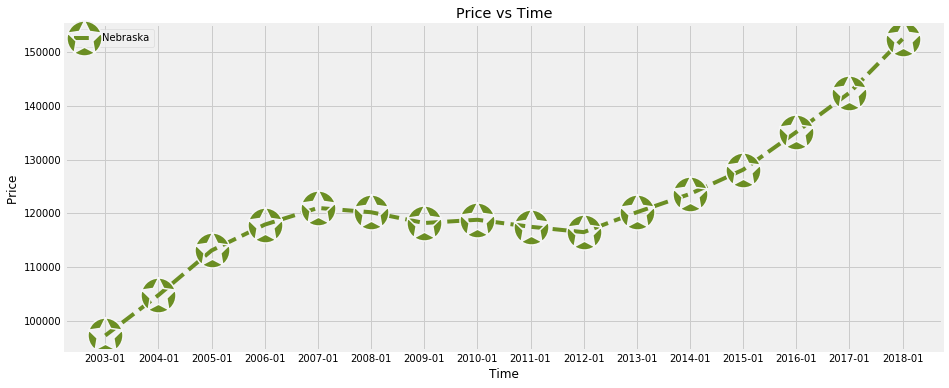

In [17]:
allHomesGamePeriod  = roundYearEndTdf(file_stateAllHomes,2003,2019)
pltPlotEZstar(allHomesGamePeriod,'California')
pltPlotEZstar(allHomesGamePeriod,'Colorado')
pltPlotEZstar(allHomesGamePeriod,'Nebraska')
# allHomesGamePeriod

In [18]:
def metroDateTdf(file):
    """file: path to CSV file obtained from ZILLOW
    returns a dataframe with dateTime timestamp on index
    """
    _df = pd.read_csv(file, encoding='ISO-8859-1').drop(columns=['RegionID','SizeRank'])
    _Tdf = _df.set_index(['RegionName']).T.reset_index()
    _Tdf['Date'] = _Tdf['index']
    _Tdf['DateDT']=pd.to_datetime(_Tdf['Date']) 
    return _Tdf.drop(columns=['index','Date']).set_index(['DateDT'])

In [19]:
#===================== zillow data =====================
# zillow home value index break down metro
# create a dataframe and pull US average
file_metroAllHomes = 'zillow/metro/Metro_Zhvi_AllHomes.csv'
allHomesMetro_df = metroDateTdf(file_metroAllHomes)
USavg_list = allHomesMetro_df['United States'].tolist()
allHomes_df['UnitedStates'] = USavg_list
# allHomes_df['UnitedStates']

In [20]:
# zillow home value index break down state ONE BEDROOM
file_stateOneBed = 'zillow/state/State_Zhvi_1bedroom.csv'
oneBed_df = stateDateTdf(file_stateOneBed)
# oneBed_df.describe()

In [21]:
# zillow home value index break down state TWO BEDROOMS
file_stateTwoBed = 'zillow/state/State_Zhvi_2bedroom.csv'
twoBed_df = stateDateTdf(file_stateTwoBed)
# twoBed_df.describe()

In [22]:
# zillow home value index break down state THREE BEDROOMS
file_stateThreeBed = 'zillow/state/State_Zhvi_3bedroom.csv'
threeBed_df = stateDateTdf(file_stateThreeBed)
# threeBed_df.describe()

In [23]:
# zillow home value index break down state CONDO
file_stateCondo = 'zillow/state/State_Zhvi_Condominum.csv'
condo_df = stateDateTdf(file_stateCondo)
# condo_df.describe()
#===================== zillow data end=====================

In [24]:
# ====================== FED macro-econ DATA  =================== 
#----------------------------------------------------------------
#data | fileName (all files are .csv and monthly)
#----------------------------------------------------------------
# Unemployment Rate: 20 years and over (LNS14000024) 
# Median Family Income in the United States (MEFAINUSA646N) 
# Consumer Price Index for All Urban Consumers: All Items (CPIAUCSL) 
# 15-Year Fixed Rate Mortgage Average in the United States (MORTGAGE15US)
# 30-Year Fixed Rate Mortgage Average in the United States (MORTGAGE30US) 
# Civilian Unemployment Rate (UNRATE) 
# Consumer Price Index for All Urban Consumers: Rent of primary residence (CUUR0000SEHA) 


In [25]:
def fedSeriesFromCSV(file):
    """converts csv files from fed 
    """
    file_name_pre = 'fed/'
    file_name_post = '.csv'
    file_nameFull = file_name_pre+file +file_name_post
    return pd.read_csv(file_nameFull).set_index('DATE')['1997-01-01':'2019-01-01'][file]

In [26]:
fedFileList = ['CPIAUCSL',
               'CUUR0000SEHA',
               'LNS14000024',
               'MEFAINUSA646N',
               'MORTGAGE15US',
               'MORTGAGE30US'
               ]

In [27]:
def fedDataframeFromCSV(file_list):
    """file_list: all csv files
    returns a dataframe with monthly obs
    """
    _df_ = pd.DataFrame(data=None)
    for file in file_list:
        _df_[file] = fedSeriesFromCSV(file)
    return _df_.interpolate()

In [28]:
masterFED_df = fedDataframeFromCSV(fedFileList)


masterFED_df['United States'] = allHomesMetro_df['United States']['1997-01-01':'2019-01-01'].tolist()
masterFED_df.head()

,CPIAUCSL,CUUR0000SEHA,LNS14000024,MEFAINUSA646N,MORTGAGE15US,MORTGAGE30US,United States
DATE,,,,,,,
1997-01-01,159.4,164.4,4.6,44568.00,7.328,7.8240,102100.0
1997-02-01,159.7,164.8,4.5,44748.75,7.150,7.6500,102400.0
1997-03-01,159.8,165.1,4.5,44929.50,7.405,7.8975,102700.0
1997-04-01,159.9,165.5,4.4,45110.25,7.675,8.1425,103000.0
1997-05-01,159.9,165.9,4.2,45291.00,7.472,7.9440,103300.0


In [29]:
import seaborn as sns


In [30]:
def snsRegressionPlot(df,yTarget):
    """df is a pivoted dataframe,
    yTarget is the value to be predicted
    ----default is 'United States'
    returns plot with regression
    """
    c0lorList = colorList.copy()
    plt.figure(figsize=(15,10))
    plt.rcParams["font.size"] = 18
    plt.grid(True)
    _colList_ = df.columns
    yTarget='United States'
    for col in _colList_:
        plt.figure(figsize = (12,7))        
        _title_= str(col) +' vs mean US house price'
        plt.title(_title_)
        plt.xlabel(col)
        plt.ylabel(yTarget)
        rand1nt = np.random.randint(0,len(c0lorList))
        c0lor = c0lorList[rand1nt] 
        sns.regplot(y=yTarget, x=col, data=df, fit_reg = True, color=c0lor)
        plt.show()
    return None

In [31]:
# snsRegressionPlot(masterFED_df,yTarget='United States')
def snsRegPlotEZ(df,ytarget):
    """df:dataframe, label:field name to bring
    """
    c0lorList = colorList.copy()
    rand1nt = np.random.randint(0,len(c0lorList))
    c0lor = c0lorList[rand1nt] 
    plt.figure(figsize=(15,10))
    plt.rcParams["font.size"] = 18
    plt.grid(True)
    plt.title("Price vs Time Series")
    plt.xlabel("Time")
    plt.ylabel("Price ")
    plt.plot(df[label],
             linestyle='--', 
             marker = 'o', 
             markersize='15',
             markeredgecolor='whitesmoke',
             markeredgewidth='1.5',
             color = c0lor,
             label=label
            )
    plt.legend(loc='best')
    plt.show()
    return 

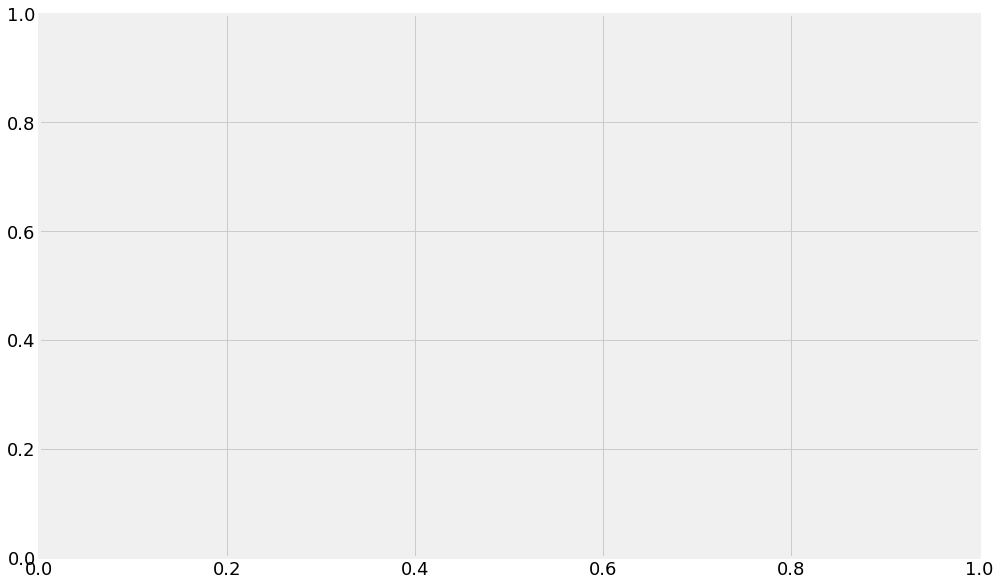

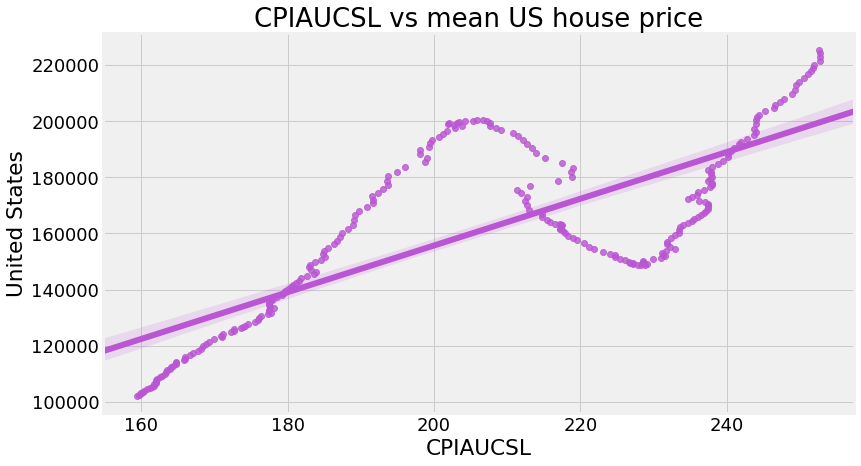

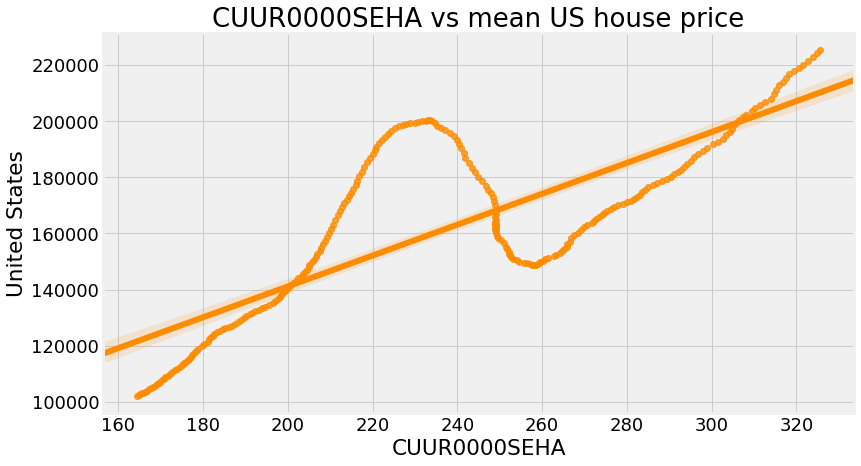

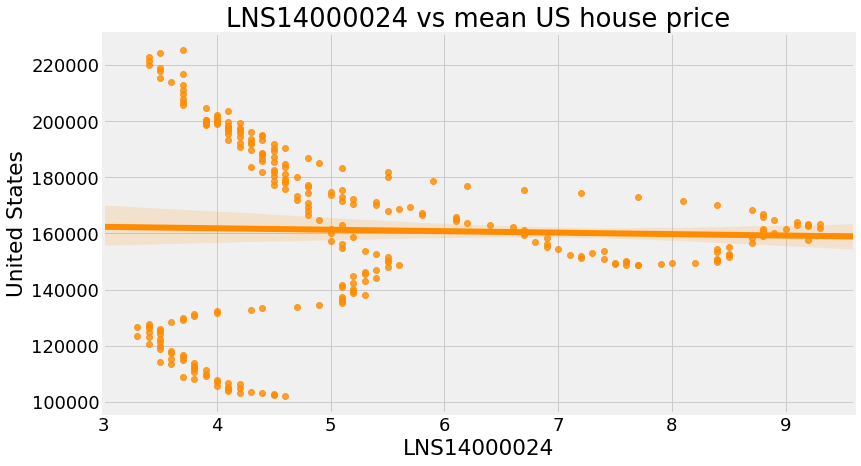

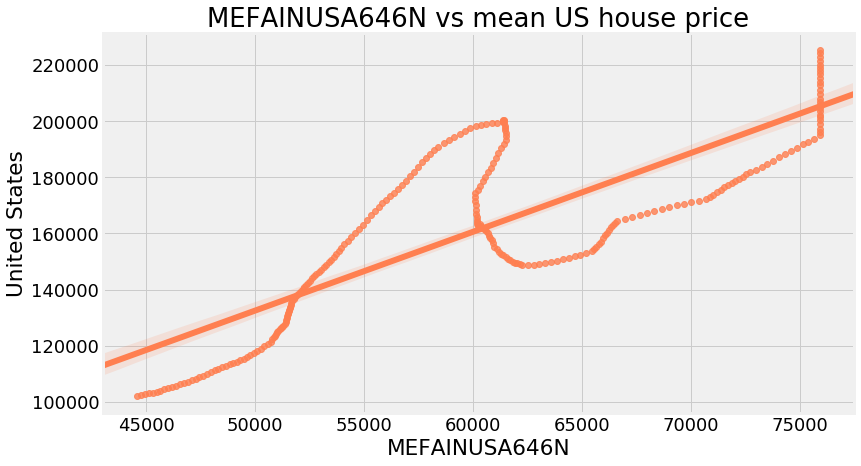

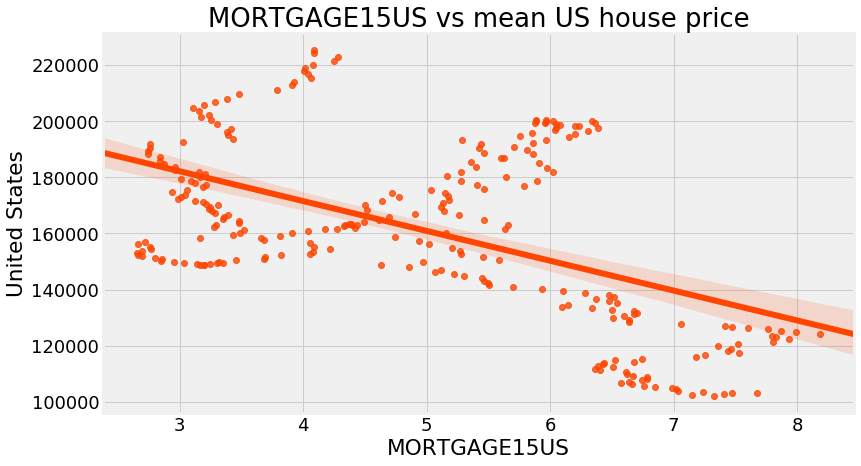

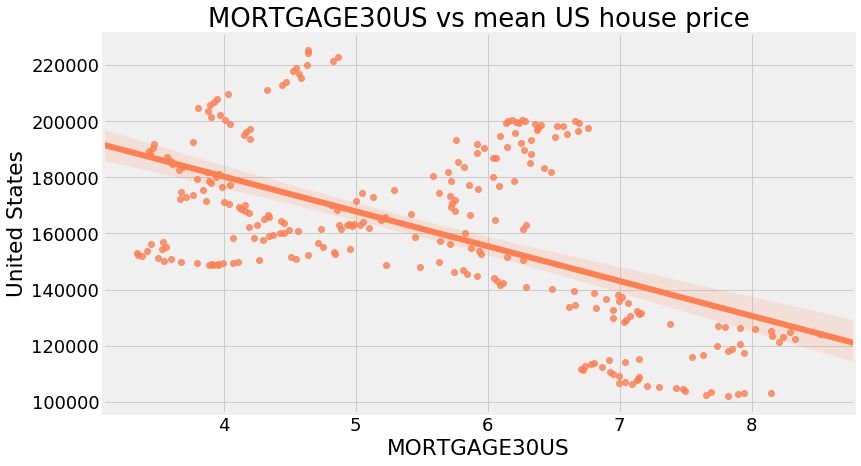

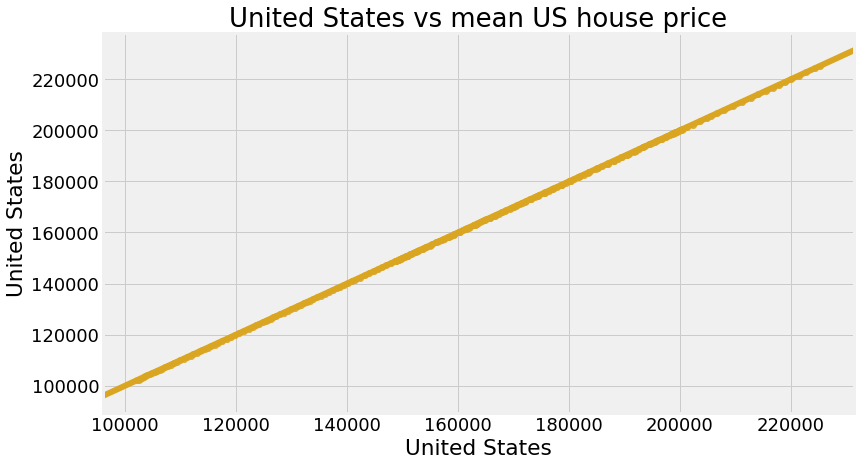

In [32]:
snsRegressionPlot(masterFED_df,'UnitedStates')

In [33]:
from sklearn.linear_model import LinearRegression

In [34]:
def predictionNumpyArray(X,y):
    """ X: base dimension | y:target field
        returns numpy array
    """
    _model_ = LinearRegression()
    _model_ = _model_.fit(X,y)
#     print(str(round(model.coef_[0],2))+' *X + $'+str(round(model.intercept_/1000,2))+' thousands')
    return np.array(_model_.predict(X))

In [35]:
def predictActualErrorDF(X,y):
    """ X: base value ex. round number 
    | y:target field ex. house price
        returns numpy array object
    """
    _model_ = LinearRegression()
    _model_ = _model_.fit(X,y)
    _predictions_ = np.array(_model_.predict(X))
    return pd.DataFrame({"Predicted": _predictions_, 
                         "Actual": y, 
                         "Error": _predictions_ - y})[["Predicted", "Actual", "Error"]]
